### Load libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import reaction_models as rxn
import plateau_analysis_fxns as paf

### Load regressed parameters

In [3]:
sp_params = pd.read_csv('fitted_parameters_simple_physics_master.csv', index_col = 0)
display(sp_params)

,case,A1,A2,E1,E2
0,1,72.448290,49.507804,6.935788,12.492344
1,2,76.600171,10.396757,7.230669,7.513692
2,3,139.553241,88.739652,9.168945,14.244120
3,4,128.446729,31.224946,8.829378,11.261605
4,5,123.821545,5.535530,8.626742,5.943396
5,6,124.860947,107.160563,8.891237,14.778025
6,7,89.285271,27.945122,7.883856,10.946193
7,8,107.241241,44.968585,8.224972,12.476900
8,9,197.867993,4.666031,9.897156,6.461187
9,10,62.698517,183.592116,6.550067,16.606276


### Define temperature range and run models

<Figure size 432x288 with 0 Axes>

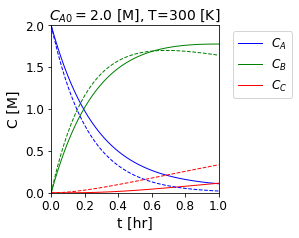

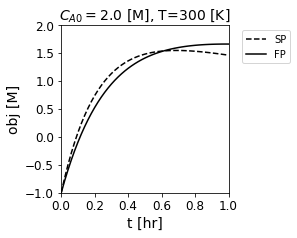

<Figure size 432x288 with 0 Axes>

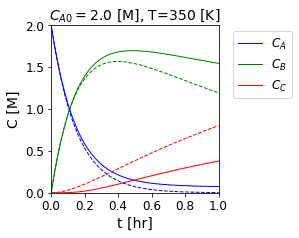

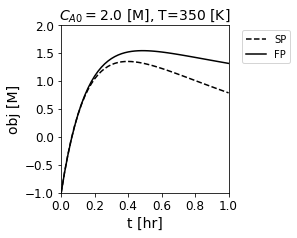

<Figure size 432x288 with 0 Axes>

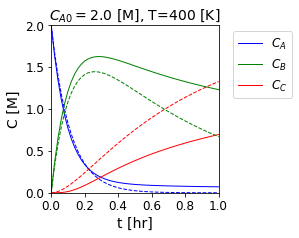

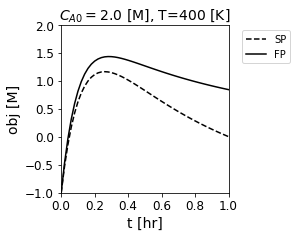

<Figure size 432x288 with 0 Axes>

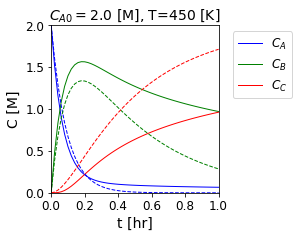

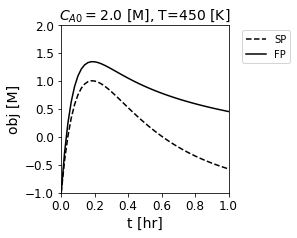

<Figure size 432x288 with 0 Axes>

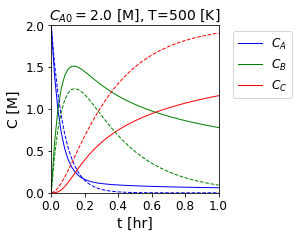

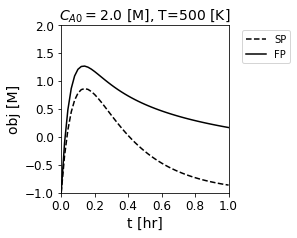

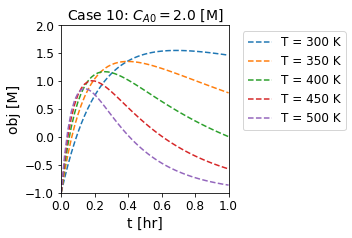

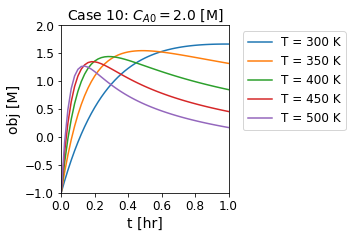

In [14]:
T = np.linspace(300, 500, 5) # temperature range of interest
CA0 = 2.0 # [M] starting concentration of A
t = np.linspace(0, 1, 51) # [hr] time range
obj_weights = [-0.5,1,-0.5,0,0] # weights for objective function

# initialize objective function outputs
obj_fp = np.zeros([len(t), len(T)]) 
obj_sp = 0*obj_fp

# set full physics parameters
A_fp = np.array([200, 100, 50])
E_fp = np.array([10, 20, 15])
θ_fp = np.hstack([A_fp, E_fp])

# get parameters for case of interest
case_no = 10
θ_sp = paf.get_case_params(case_no, sp_params)

for i in np.arange(0, len(T)):
    
    # simulate full physics model
    CA_fp, CB_fp, CC_fp = rxn.full_physics_model_2(θ_fp, t, CA0, T[i])
    
    # simulate simple physics model
    CA_sp, CB_sp, CC_sp = rxn.simple_physics_model(θ_sp, t, CA0, T[i])
    
    # plot full and simple physics models
    paf.spfp_plot_props(np.array([CA_fp, CB_fp, CC_fp]), np.array([CA_sp, CB_sp, CC_sp]), t, CA0, T[i], case_no, save = 'TRUE')
    
    # compute objective function for full physics
    obj_fp[:,i] = paf.objective_function(CA_fp, CB_fp, CC_fp, t, T[i], obj_weights, print_level = 2, temp_ref = 500)
    
    # compute objective function for simple physics
    obj_sp[:,i] = paf.objective_function(CA_sp, CB_sp ,CC_sp, t, T[i], obj_weights, print_level = 2, temp_ref = 500)
    
    # plot objectives from simple and full physics
    paf.plot_obj_fxn(t, obj_sp[:,i], obj_fp[:,i], CA0, T[i], case_no, save = 'TRUE')
    
paf.plot_obj_fxn_temp(t, obj_sp, CA0, T, case_no, save = 'TRUE', model_type = 'SP')

paf.plot_obj_fxn_temp(t, obj_fp, CA0, T, case_no, save = 'TRUE', model_type = 'FP')


In [4]:
#  # return k1, k2, k3 for full physics model
#     k_fp = rxn.kinetics(θ_fp[0:3], θ_fp[3:6], T[i])
    
#     # compute instantaneous yield of full physics
#     YB_fp = (k_fp[0]*CA_fp - k_fp[2]*CB_fp**3 + k_fp[1]*CC_fp)/(k_fp[0]*CA_fp + k_fp[2]*CB_fp)
    
#     # return k1 and k2 for simple physics model
#     k_sp = rxn.kinetics(θ_sp[0:2], θ_sp[2:4], T[i])
    
#     # compute instantaneous yield of simple physics
#     # YB_sp = (k_sp[0]*CA_sp - k_sp[1]*CB_sp)/(k_sp[0]*CA_sp)
    
#     #plt.figure()
#     plt.plot(t, YB_fp, label = 'FP')
#     plt.plot(t, YB_sp, label = 'SP')
#     plt.legend()